# Neural Network Workshop

#### Importing Libraries


In [3]:
import numpy as np

#### Activation Function

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#### Neuron Class

In [ ]:
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

#### First Application - Simple Neural Network

In [ ]:
class FirstNeuralNetwork:
    
    def __init__(self, x, y):
        
        
    def feedforward(self, x):

        

### Second Application - Classification ANN w/ Tensorflow

#### Importing the TensorFlow and Keras libraries.

In [39]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

#### Fashion-MNIST dataset.

In [40]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#### Labels for dataset

In [41]:
labels = ['T-shirt', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

#### Plotting samples

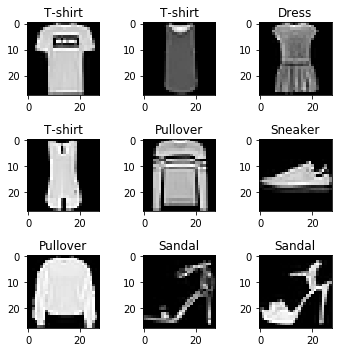

In [42]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(labels[y_train[i]])
fig.tight_layout()
plt.show()

#### Normalizing images

In grayscale, pixel intensities vary from 0 (black) to 255 (white), and everything in between are shades of grey. Here is the results from printing the pixel intensities of an image in the dataset.

In [43]:
print(x_train[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

We change

In [44]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

#### Reshaping data

We are reshaping the data so that there are

In [55]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

#### One-hot encoding

In [46]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Using TensorFlow backend.


#### Building the model

In [47]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation


model = Sequential()
model.add(Dense(784, activation='sigmoid', input_dim=784))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 639,300
Trainable params: 639,300
Non-trainable params: 0
_________________________________________________________________


#### Compiling model

In [48]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

#### Training the model

In [49]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 30us/step - loss: 2.2557 - accuracy: 0.2801
Epoch 2/10
60000/60000 [==============================] - 2s 27us/step - loss: 2.0406 - accuracy: 0.4658
Epoch 3/10
60000/60000 [==============================] - 2s 27us/step - loss: 1.7448 - accuracy: 0.5985
Epoch 4/10
60000/60000 [==============================] - 2s 27us/step - loss: 1.4757 - accuracy: 0.6648
Epoch 5/10
60000/60000 [==============================] - 2s 30us/step - loss: 1.2814 - accuracy: 0.6864
Epoch 6/10
60000/60000 [==============================] - 2s 33us/step - loss: 1.1419 - accuracy: 0.7021
Epoch 7/10
60000/60000 [==============================] - 2s 31us/step - loss: 1.0388 - accuracy: 0.7119
Epoch 8/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.9601 - accuracy: 0.7218
Epoch 9/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.8986 - accuracy: 0.7262
Epoch 10/10
60000/60000 [==============================

#### Evaluating model

In [50]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(print('Test accuracy:', round(test_acc,4)))

10000/10000 [==============================] - 0s 32us/step
Test accuracy: 0.7298
None


#### Visualizing results

In [56]:
import pandas as pd

test_pred = []
for i in range(10):
    test_pred.append(labels[model.predict(x_test[i],batch_size=10)])

fig = plt.figure(figsize=(5, 5))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))
    plt.title("Actual: " + labels[y_test[i]] + ", Prediction: " + labels[test_pred[i]])
fig.tight_layout()
plt.show()
    

ValueError: Error when checking input: expected dense_1_input to have shape (784,) but got array with shape (1,)